In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from keras.layers import Activation
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import itertools



Using TensorFlow backend.


In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
col_name = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = dataset[col_name]
y = dataset['Outcome']

In [4]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = Sequential([
    Dense(12, input_dim=8, activation = 'relu'),
    Dense(12, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

In [ ]:
model.compile('Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=10, epochs=500, validation_split=0.1, shuffle=True)

In [9]:
model.fit(X_train, y_train, batch_size=10, epochs=5, validation_split=0.1, shuffle=True)

Train on 552 samples, validate on 62 samples
Epoch 1/5
552/552 [==============================] - 1s 925us/step - loss: 0.4247 - acc: 0.8152 - val_loss: 0.5460 - val_acc: 0.7742
Epoch 2/5
552/552 [==============================] - 0s 896us/step - loss: 0.4501 - acc: 0.8025 - val_loss: 0.3848 - val_acc: 0.8065
Epoch 3/5
552/552 [==============================] - 0s 783us/step - loss: 0.4499 - acc: 0.8025 - val_loss: 0.4014 - val_acc: 0.8871
Epoch 4/5
552/552 [==============================] - 0s 854us/step - loss: 0.4405 - acc: 0.7953 - val_loss: 0.4086 - val_acc: 0.8226
Epoch 5/5
552/552 [==============================] - 0s 739us/step - loss: 0.4383 - acc: 0.8025 - val_loss: 0.4793 - val_acc: 0.8387


In [10]:
predictions = model.predict_classes(X_test, batch_size=10, verbose=0)

In [11]:
cm = confusion_matrix(y_test, predictions)

In [12]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis-1)[:, np.newaxis]
        print("Normalized Confusion Mtrix")
    else:
        print('Confusion Matrix, without normalization')
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[72 24]
 [13 45]]


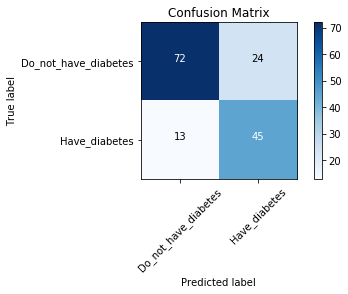

In [13]:
cm_plot_labels = ['Do_not_have_diabetes', 'Have_diabetes']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [14]:
history = model.history.history
for key in history.keys():
    print(key)

val_loss
val_acc
loss
acc


In [15]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['acc']
    val_acc = history['val_acc']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

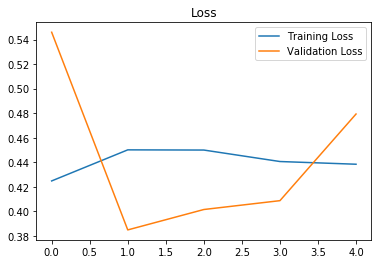

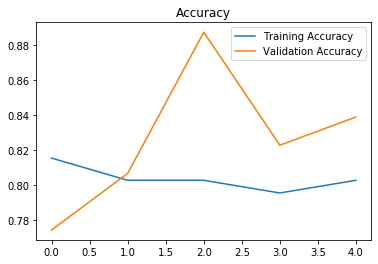

In [16]:
plot_metrics(history)

In [17]:
f1_score(y_test, predictions)

0.7086614173228347

In [18]:
accuracy_score(y_test, predictions)

0.7597402597402597

In [19]:
recall_score(y_test, predictions)

0.7758620689655172

In [20]:
precision_score(y_test, predictions)

0.6521739130434783

In [21]:
model.save('diabetes_prediction.h5')